In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_restaurants = pd.read_csv('data/processed/processed_restaurants_logged.csv')
df_restaurants_menus = pd.read_csv('data/raw/restaurant-menus.csv')
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62791 entries, 0 to 62790
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             62791 non-null  int64  
 1   position       62791 non-null  int64  
 2   name           62791 non-null  object 
 3   score          35018 non-null  float64
 4   ratings        35018 non-null  float64
 5   category       62769 non-null  object 
 6   price_range    62791 non-null  int64  
 7   full_address   62791 non-null  object 
 8   zip_code       62791 non-null  object 
 9   lat            62791 non-null  float64
 10  lng            62791 non-null  float64
 11  restaurant_id  62791 non-null  float64
 12  avg_price      62791 non-null  float64
 13  price_sum      62791 non-null  float64
 14  price_min      62791 non-null  float64
 15  price_max      62791 non-null  float64
 16  desc_avg_len   62791 non-null  float64
 17  log_avg_price  62791 non-null  float64
dtypes: flo

## Which ZIP codes host the most restaurants?

In [2]:
print('there are ', df_restaurants['zip_code'].unique().size, ' unique zip code')
most_used_zip_cods = df_restaurants['zip_code'].value_counts().head(5).reset_index()
most_used_zip_cods

there are  2432  unique zip code


,zip_code,count
0,75034,337
1,77004,225
2,77057,223
3,77494,221
4,22314,189


Text(0, 0.5, 'count')

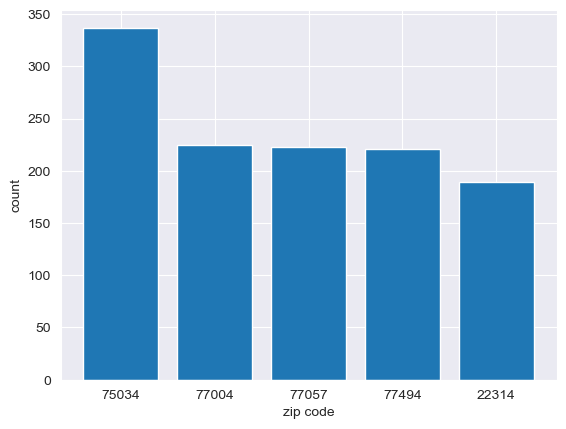

In [3]:
plt.bar(most_used_zip_cods['zip_code'], most_used_zip_cods['count'])
plt.xlabel('zip code')
plt.ylabel('count')

## How are restaurants distributed geographically?
using `Latitude` and `Longitude` we can calculate and And distribute the position on a map

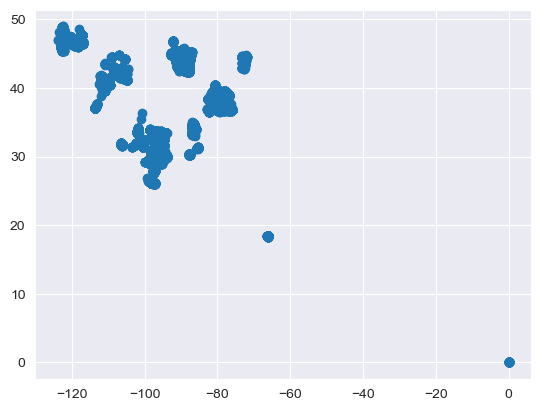

In [4]:
plt.scatter(df_restaurants['lng'], df_restaurants['lat'])

## To make the visualization more clear we can cut the same part from the map

In [5]:
print('max Longitude', df_restaurants['lng'].max())
print('min Longitude', df_restaurants['lng'].min())
print('max Latitude', df_restaurants['lat'].max())
print('min Latitude', df_restaurants['lat'].min())


max Longitude 0.0
min Longitude -123.84124
max Latitude 48.96395
min Latitude 0.0


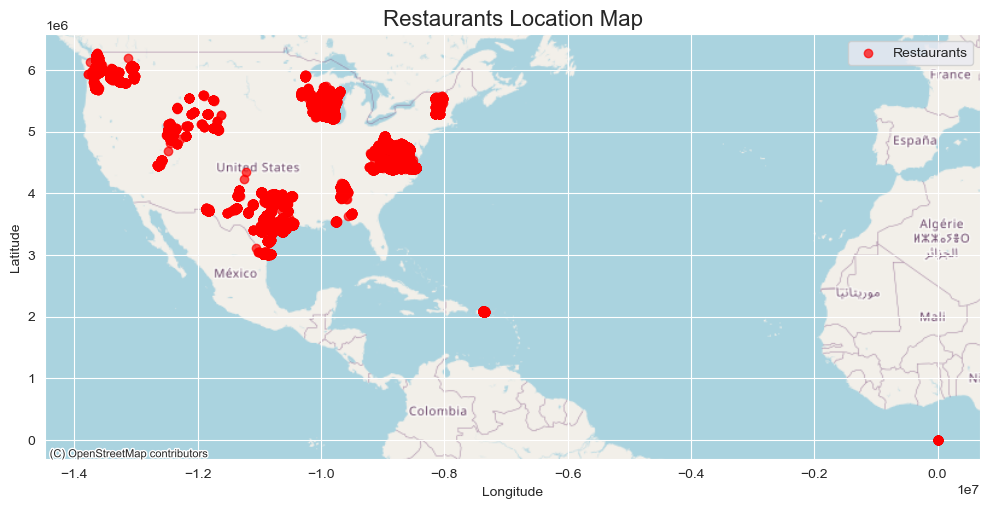

In [6]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Convert your DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_restaurants,
    geometry=gpd.points_from_xy(df_restaurants['lng'], df_restaurants['lat']),
    crs="EPSG:4326"  # WGS84 for lat/lon
)

# Reproject to Web Mercator for plotting with contextily
gdf = gdf.to_crs(epsg=3857)

# Plot with background map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', alpha=0.7, label="Restaurants")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Format the plot
ax.set_title("Restaurants Location Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()


# Is there a relationship between geographic position and review ratings?

To answer this question, we first need to categorize the data based on latitude and longitude.

Here are the updated geographic categories:

| Category Number | Latitude Range | Longitude Range  | Description                     |
|-----------------|----------------|------------------|---------------------------------|
| 1               | 45 to 50       | -150 to -110     | Far Northwest                   |
| 2               | 35 to 45       | -120 to -100     | Western to Central US           |
| 3               | 25 to 38       | -110 to -90      | Southern Central                |
| 4               | 28 to 38       | -90 to -80       | Lower Eastern US                |
| 5               | 35 to 45       | -90 to -70       | Central to Eastern              |
| 6               | 40 to 50       | -100 to -80      | Midwest                         |
| 7               | 40 to 47       | -80 to -60       | Northeast                       |
| 8               | Anything else  | Outside America  | Out of defined region           |

### categorys on image
![Restaurant-category-distribution](img/Restaurant-category-distribution.png)

Text(0, 0.5, 'count')

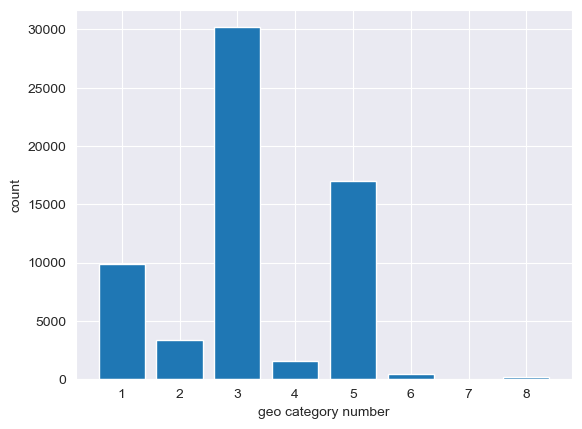

In [7]:
def get_category(lat, lng):
    if 45 <= lat <= 50 and -150 <= lng <= -110:
        return 1
    elif 35 <= lat <= 45 and -120 <= lng <= -100:
        return 2
    elif 25 <= lat <= 38 and -110 <= lng <= -90:
        return 3
    elif 28 <= lat <= 38 and -90 <= lng <= -80:
        return 4
    elif 35 <= lat <= 45 and -90 <= lng <= -70:
        return 5
    elif 40 <= lat <= 50 and -100 <= lng <= -80:
        return 6
    elif 40 <= lat <= 47 and -80 <= lng <= -60:
        return 7
    else:
        return 8  # Anything else, outside defined range


df_restaurants['geo_category'] = df_restaurants.apply(lambda row: get_category(row['lat'], row['lng']), axis=1)

category_counts = df_restaurants['geo_category'].value_counts().reset_index()

plt.bar(category_counts['geo_category'], category_counts['count'])
plt.xlabel('geo category number')
plt.ylabel('count')

In [8]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62791 entries, 0 to 62790
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             62791 non-null  int64  
 1   position       62791 non-null  int64  
 2   name           62791 non-null  object 
 3   score          35018 non-null  float64
 4   ratings        35018 non-null  float64
 5   category       62769 non-null  object 
 6   price_range    62791 non-null  int64  
 7   full_address   62791 non-null  object 
 8   zip_code       62791 non-null  object 
 9   lat            62791 non-null  float64
 10  lng            62791 non-null  float64
 11  restaurant_id  62791 non-null  float64
 12  avg_price      62791 non-null  float64
 13  price_sum      62791 non-null  float64
 14  price_min      62791 non-null  float64
 15  price_max      62791 non-null  float64
 16  desc_avg_len   62791 non-null  float64
 17  log_avg_price  62791 non-null  float64
 18  geo_ca

### category `3` is the most frequent category

# Now we are ready to start answring on the question
## `Is there a relationship between geographic position and review ratings?`

In [9]:
# print(df_restaurants.isnull().sum())
# print(df_restaurants_droped_null.isnull().sum())
df_restaurants_droped_null = df_restaurants.dropna(subset=['score', 'ratings'])

print(df_restaurants_droped_null['score'].corr(df_restaurants_droped_null['ratings']))
geo_cat_per_score_mean = df_restaurants_droped_null.groupby('geo_category')[['ratings', 'score']].mean().reset_index()
geo_cat_per_score_mean.columns = ['geo_category', 'ratings_count_mean', 'score_mean']
geo_cat_per_score_mean

0.17410430034156132


,geo_category,ratings_count_mean,score_mean
0,1,75.714801,4.597949
1,2,42.824551,4.505928
2,3,75.157620,4.534389
3,4,45.441349,4.495308
4,5,80.895168,4.565392
5,6,39.483607,4.467213
6,8,172.439560,4.680769


Text(0, 0.5, 'Average  ratings count')

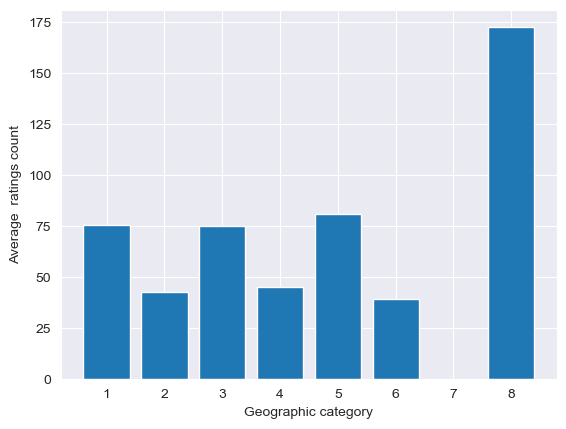

In [10]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['ratings_count_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  ratings count')

Text(0, 0.5, 'Average  score')

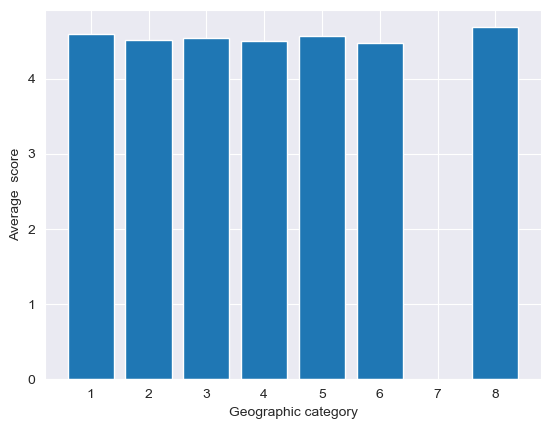

In [11]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['score_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  score')

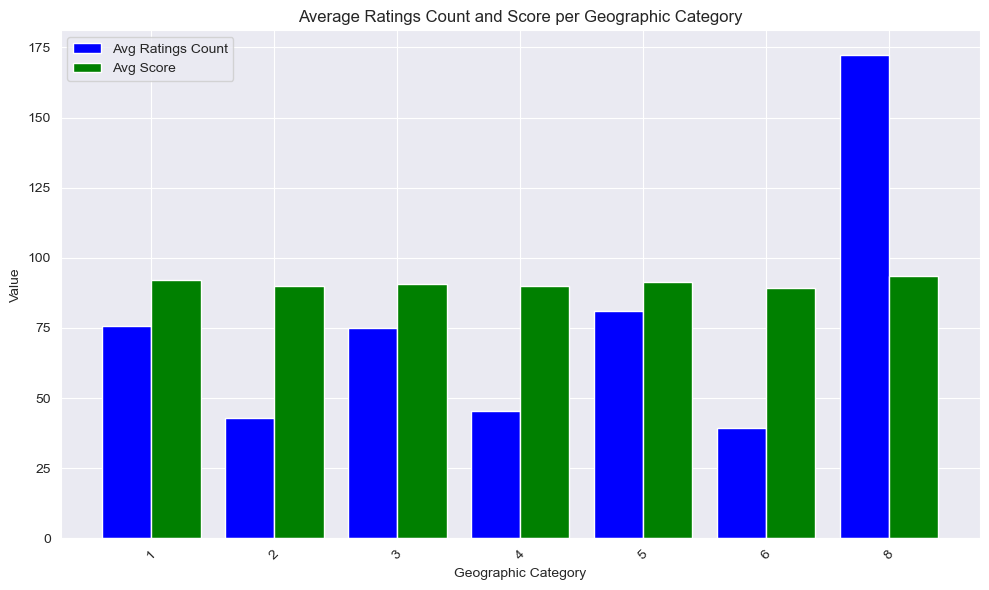

In [12]:

# Assuming geo_cat_per_score_mean is a DataFrame
labels = geo_cat_per_score_mean['geo_category']
x = np.arange(len(labels))  # the label locations
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Blue bars for ratings count
bars1 = ax.bar(x - width / 2, geo_cat_per_score_mean['ratings_count_mean'] / 100 * 100, width,
               label='Avg Ratings Count', color='blue')

# Green bars for score
bars2 = ax.bar(x + width / 2, geo_cat_per_score_mean['score_mean'] / 5 * 100, width, label='Avg Score', color='green')

# Labels and title
ax.set_xlabel('Geographic Category')
ax.set_ylabel('Value')
ax.set_title('Average Ratings Count and Score per Geographic Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Does description length correlate with menu price?

In [13]:
removed_zero_desc = df_restaurants[df_restaurants['desc_avg_len'] != 0.0]
removed_zero_desc['avg_price'].corr(removed_zero_desc['desc_avg_len'])


0.11680095572629452

### there are week postive coraltion between description length and price

## count most common word in description from over all menu

<BarContainer object of 5 artists>

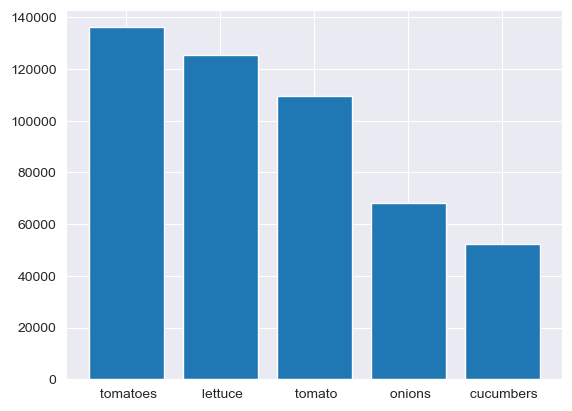

In [14]:
non_null_descriptions = df_restaurants_menus['description'].dropna()

all_words = non_null_descriptions.str.split(',', expand=True).stack()
word_counts = all_words.str.lower().value_counts()
most_common_words = word_counts.head(5)
plt.bar(most_common_words.index, most_common_words.values)
